<a href="https://colab.research.google.com/github/shaimaa122/Customer_Churn_ML_Project/blob/main/Customer_Segmentation_SDA_Final_Shaima_Alharbi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saudi Digital Academy 
## Customer Segmentation - Final Project - Feb 25th, 2021
## *Shaima Alharbi*
---
 


 

### Overview: 
In this final project, My goal is to help companies or market to success the business by classfiy the customers into segmentations that  are similar in specific ways.

- [ Data ](https://github.com/shaimaa122/Customer_segment/blob/main/Train.csv)
- [ Data Dictionary](https://github.com/shaimaa122/Customer_Segmentation_SDA_Final/blob/main/Customer%20Segmentation%20-%20Data%20Dictinory.pdf)
- [ Resource ](https://www.kaggle.com/vetrirah/customer)

In [ ]:
# Importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import  confusion_matrix

import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette('Set3')

In [ ]:
url="https://github.com/shaimaa122/Customer_segment/raw/main/Train.csv" 
df= pd.read_csv(url) # Load the dataset

### Exploratory Data Analysis ( EDA )

In [ ]:
df.sample(5) # Disply sample of data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
4235,467201,Female,No,33,Yes,Engineer,NaN,Low,5.0,Cat_7,D
2707,460790,Female,Yes,42,Yes,Artist,0.0,High,2.0,Cat_2,C
2490,465452,Male,Yes,47,No,Entertainment,0.0,High,5.0,Cat_6,C
3932,463328,Female,No,23,No,Healthcare,0.0,Low,4.0,Cat_6,D
241,464150,Female,Yes,59,Yes,Artist,0.0,Average,3.0,Cat_6,C


In [ ]:
df.shape # Check the shape of data

(8068, 11)

In [ ]:
df= df.rename(columns={'Var_1': 'Category'}) # Replace the column name to Category

In [ ]:
df.columns # Disply the columns name

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category',
       'Segmentation'],
      dtype='object')

In [ ]:
df.info() # Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Category         7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
df.describe(exclude='number') # Describing categorical data

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Category,Segmentation
count,8068,7928,7990,7944,8068,7992,8068
unique,2,2,2,9,3,7,4
top,Male,Yes,Yes,Artist,Low,Cat_6,D
freq,4417,4643,4968,2516,4878,5238,2268


In [ ]:
df.describe() # Viewing some basic statistical details‏

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
len(df.ID.unique()) ,len(df) # Check if ID is duplicated or not

(8068, 8068)

In [ ]:
df=df.drop('ID',axis =1) # Drop the ID column

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#### Checking Null Values

In [ ]:
np.sum(df.isna()) # Check the null values

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Category            76
Segmentation         0
dtype: int64

- ` Ever_Married` :

 Fill the null values by the Mode (The value that appears most often)

In [ ]:
df.Ever_Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df.Ever_Married.value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

In [ ]:
df["Ever_Married"].fillna("Yes", inplace = True)

- ` Graduated ` : 

    Fill the null values by the Mode (the value that appears most often)



In [ ]:
df.Graduated.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
df.Graduated.value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

In [ ]:
df["Graduated"].fillna("Yes", inplace = True)

- ` Profession ` : 
  
   Fill the null values by the Mode (the value that appears most often)


In [ ]:
df.Profession.unique()

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', nan], dtype=object)

In [ ]:
df.Profession.value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [ ]:
df["Profession"].fillna("Artist", inplace = True)

- ` Work_Experience ` : 
    
    Fill the null values by the Mode (the value that appears most often)

In [ ]:
df.Work_Experience.unique()

array([ 1., nan,  0.,  4.,  9., 12.,  3., 13.,  5.,  8., 14.,  7.,  2.,
        6., 10., 11.])

In [ ]:
df.Work_Experience.value_counts()

1.0     2354
0.0     2318
9.0      474
8.0      463
2.0      286
3.0      255
4.0      253
6.0      204
7.0      196
5.0      194
10.0      53
11.0      50
12.0      48
13.0      46
14.0      45
Name: Work_Experience, dtype: int64

In [ ]:
df["Work_Experience"].fillna(1, inplace = True)

- ` Family_Size ` :
    
    Fill the null values by the Mode (the value that appears most often)

In [ ]:
df.Family_Size.unique()

array([ 4.,  3.,  1.,  2.,  6., nan,  5.,  8.,  7.,  9.])

In [ ]:
df.Family_Size.value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

In [ ]:
df["Family_Size"].fillna(2, inplace = True)

- ` Category ` : 

    Fill the null values by the Mode (the value that appears most often)

In [ ]:
df.Category.unique()

array(['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5'],
      dtype=object)

In [ ]:
df.Category.value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Category, dtype: int64

In [ ]:
df["Category"].fillna('Cat_6', inplace = True)

In [ ]:
np.sum(df.isna()) # check the null in all columns

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
Segmentation       0
dtype: int64

#### Data Visualization

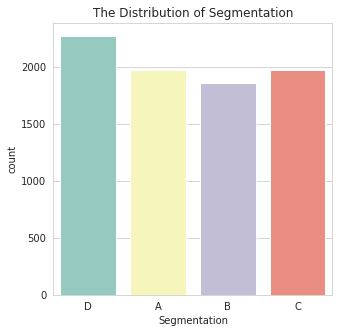

In [ ]:
fig=plt.figure(figsize=(5,5))
sns.countplot(data=df, x='Segmentation')
plt.title('The Distribution of Segmentation')
plt.savefig("The Distribution of Segmentation.png")
plt.show();

As it’s shown in the chart:
- Most of the customers are in ` D ` segmentation.
- Least of the customers are in ` B` segmentation.
- The customers in `A` and `C` segmentations  are close to each other.

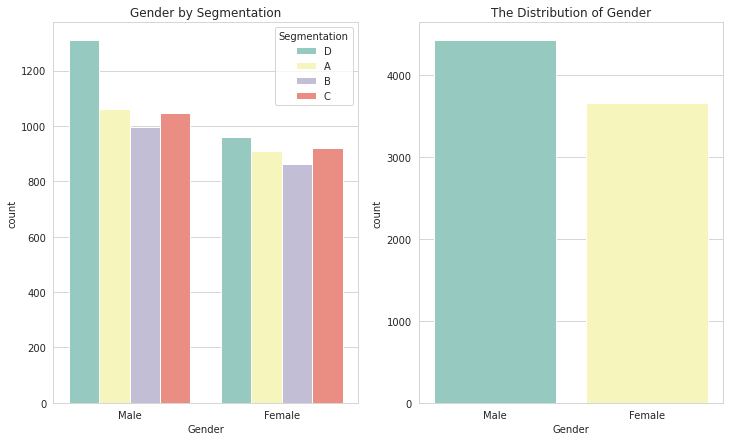

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Gender',hue='Segmentation')
plt.title('Gender by Segmentation')
plt.savefig("Gender by Segmentation.png", dpi=150);
plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Gender')
plt.title('The Distribution of Gender')  
plt.savefig("The Distribution of Gender.png", dpi=150);
plt.show();

As it’s shown in the chart:
- Most of the customers are Male.
- The `D` segmentation contains the most Males & Female and the` B` segmentation contains the least Males & Female because the numbers of Customers in `D` is more than in `B`.

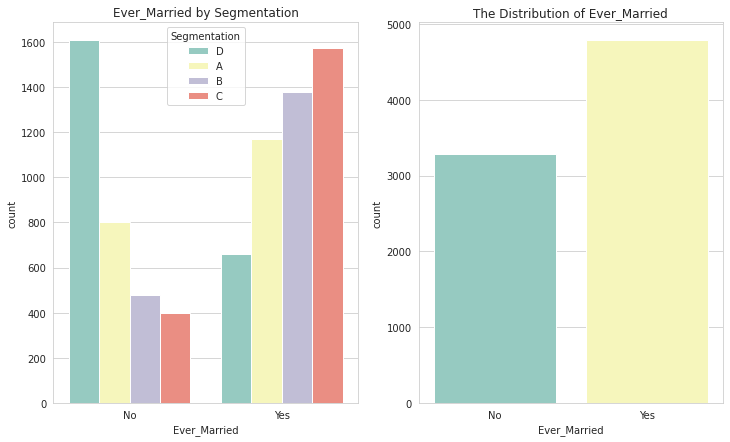

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Ever_Married',hue='Segmentation')
plt.title('Ever_Married by Segmentation')
plt.savefig("Ever_Married by Segmentation.png", dpi=150);

plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Ever_Married')
plt.title('The Distribution of Ever_Married')  
plt.savefig("The Distribution of Ever_Married.png", dpi=150);
plt.show();


As it’s shown in the chart:
- Most of the customers are Married.
- The `D` segmentation contains the most of unmarried customer, and the other segmentations (`A`,`B`,`C`) contains most of married special `C`

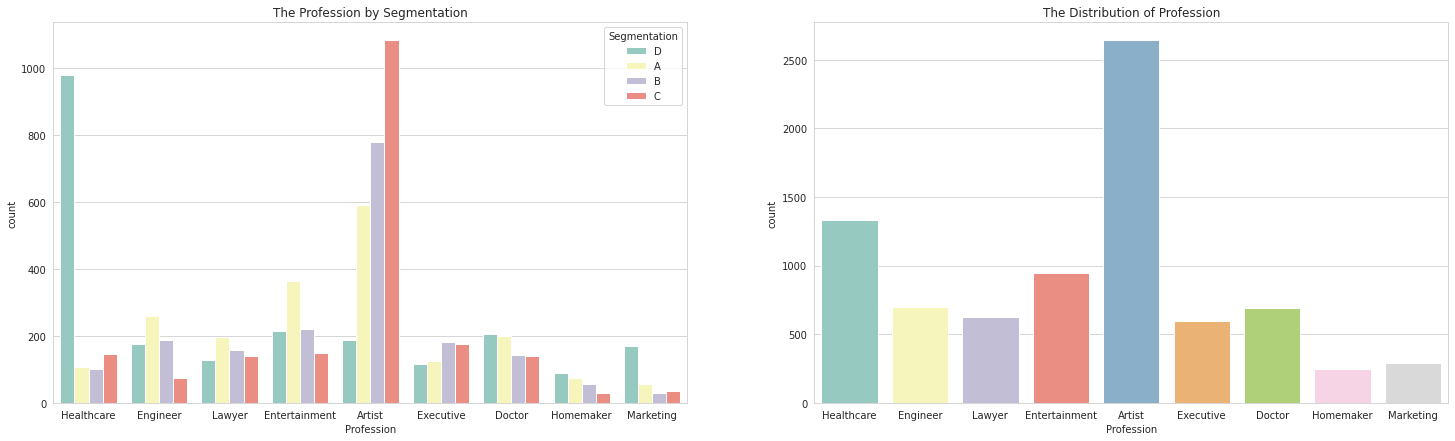

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Profession',hue='Segmentation')
plt.title('The Profession by Segmentation')
plt.savefig("The Profession by Segmentation.png", dpi=150);
plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Profession')
plt.title('The Distribution of Profession') 
plt.savefig("The Distribution of Profession.png", dpi=150);
plt.show();

As it’s shown in the chart:
- The most Profession is Artist and the least Profession is Homemaker.
- The `C` , `A` and `B`segmentations contains most of the Artist, but The `D` segmentation contains most of the Healthcare.

- The `A` and `B` segmentations that contains least of the Marketing, but The `C` and `D` segmentations contains least of the HomeMaker 
 

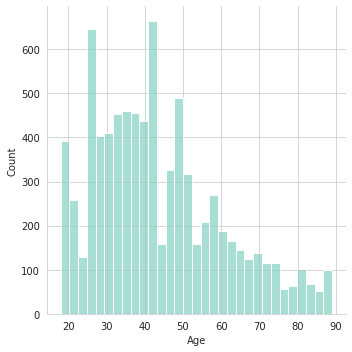

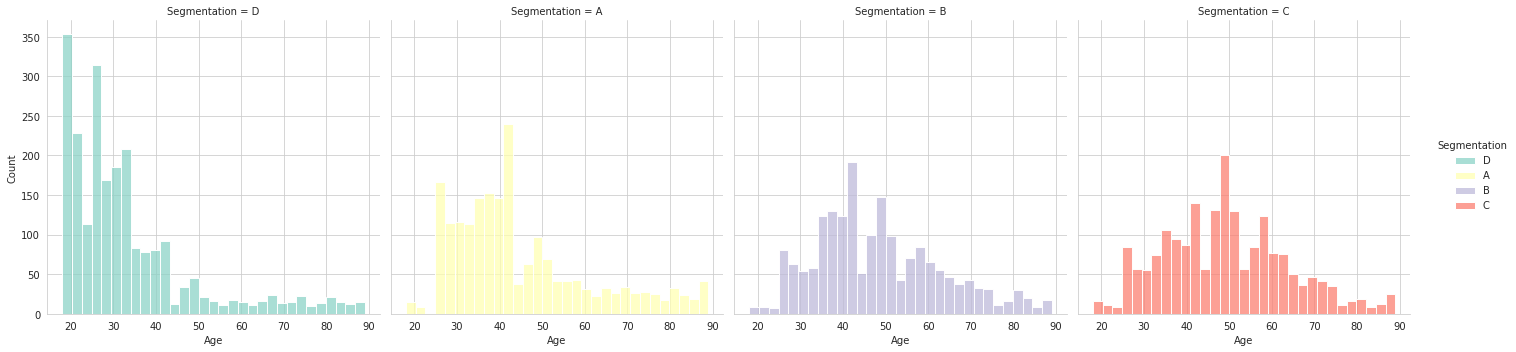

In [ ]:
sns.displot(data=df, x="Age"); 
plt.savefig("The Distribution of Age.png", dpi=150);

sns.displot(data=df, x="Age", hue="Segmentation", col="Segmentation");
plt.savefig("The Age by Segmentation.png", dpi=150);
plt.show();
 

As it’s shown in the chart:
- The most range of Customers between 20 - 45 .

- The `D` The most range of Customers between 20 - 30, So contains the most of unmarried.

- The `A` The most range of Customers between 27 - 40 

- The `B` The most range of Customers between 30 - 50

- The `C` The most range of Customers between 40 - 50, So contains the most of married.

 

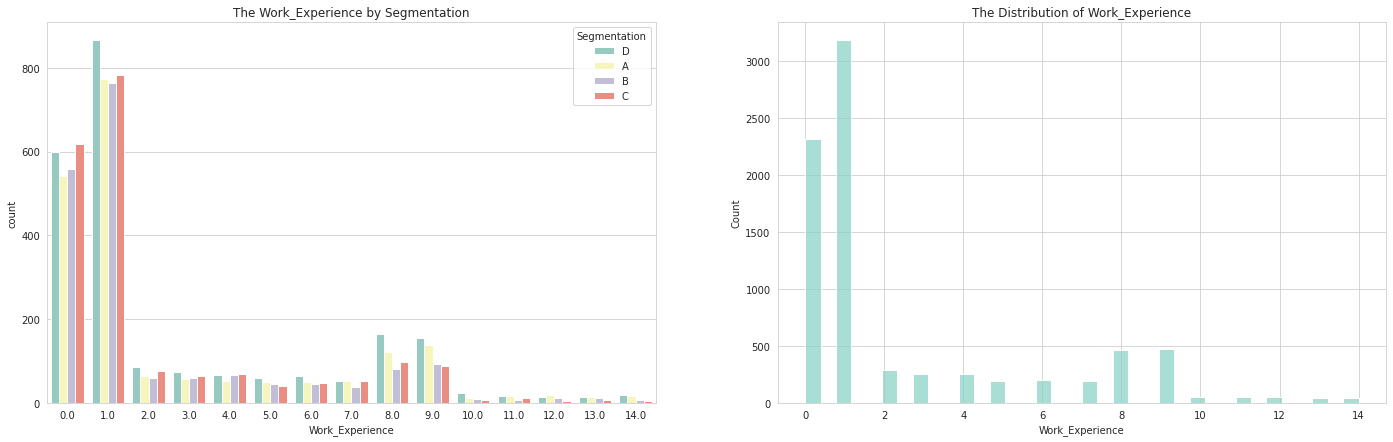

In [ ]:
plt.figure(figsize=(24,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Work_Experience',hue='Segmentation')
plt.title('The Work_Experience by Segmentation')
plt.savefig("The Work_Experience by Segmentation.png", dpi=150);
plt.subplot(1, 2 , 2)
sns.histplot(data=df, x="Work_Experience")
plt.title('The Distribution of Work_Experience') 
plt.savefig("The Distribution of Work_Experience.png", dpi=150);
plt.show();

As it’s shown in the chart:
- Most of the customers have one year experience, and  least of customers have more than 10 years experience.

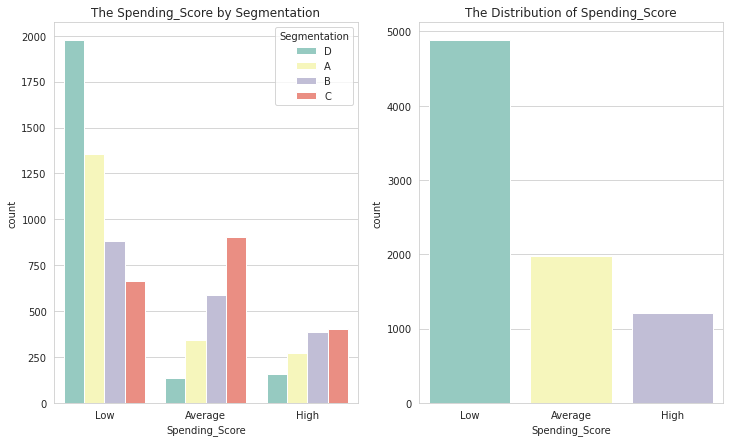

In [ ]:
plt.figure(figsize=(12,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Spending_Score',hue='Segmentation')
plt.title('The Spending_Score by Segmentation')
plt.savefig("The Spending_Score by Segmentation.png", dpi=150);

plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Spending_Score')
plt.title('The Distribution of Spending_Score')
plt.savefig("The Distribution of Spending_Score.png", dpi=150);
plt.show();

As it’s shown in the chart:
- Most of customers spending Low score and least of customers spending high.
- Most of D segmentation is spending Low, because their ages less than 30.
- Most of C segmentation is spending Average, because their ages more than 40.

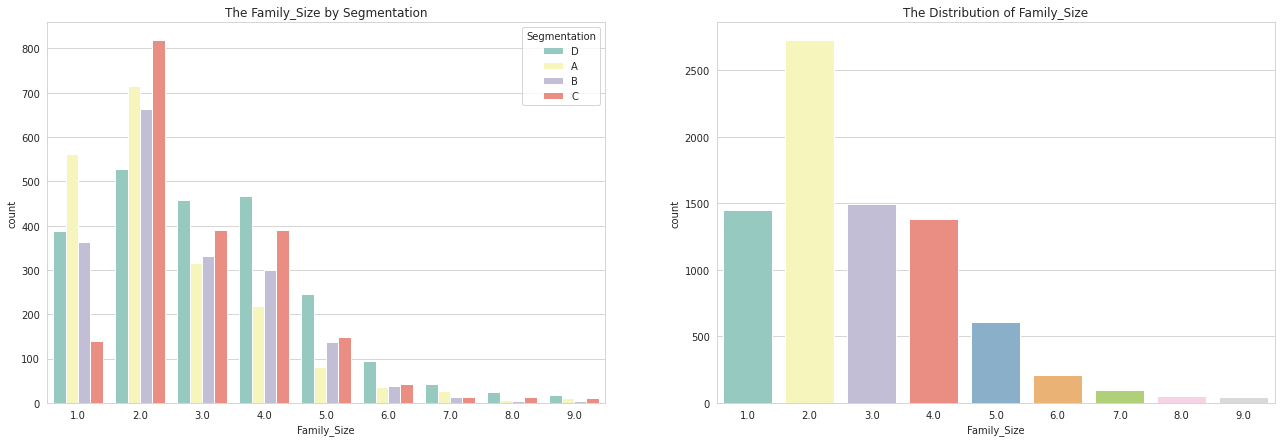

In [ ]:
plt.figure(figsize=(22,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Family_Size',hue='Segmentation')
plt.title('The Family_Size by Segmentation')
plt.savefig("The Family_Size by Segmentation.png", dpi=150);

plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Family_Size')
plt.title('The Distribution of Family_Size')
plt.savefig("The Distribution of Family_Size.png", dpi=150);
plt.show();

As it’s shown in the chart:
- Most customers have Family size of 2
- Most of customers have  Family size of 9

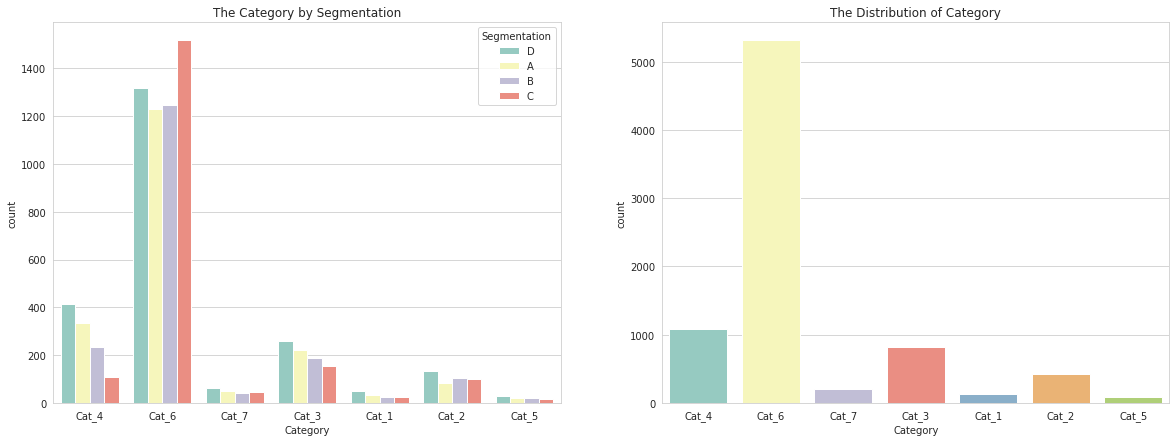

In [ ]:
plt.figure(figsize=(20,7))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Category',hue='Segmentation')
plt.title('The Category by Segmentation')
plt.savefig("The Category by Segmentation.png", dpi=150);

plt.subplot(1, 2 , 2)
sns.countplot(data=df, x='Category')
plt.title('The Distribution of Category') 
plt.savefig("The Distribution of Category.png", dpi=150);
plt.show();
 

As it’s shown in the chart:
- The most of Customers Cat_6
- The least of Customers in Cat_5 and Cat_1

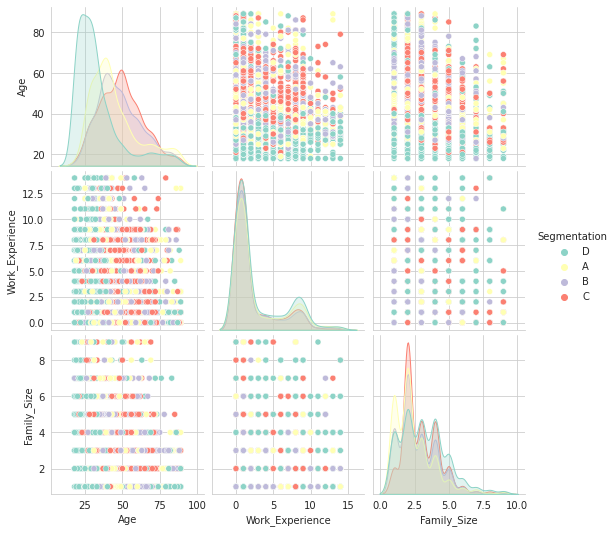

In [ ]:
sns.pairplot(df,hue="Segmentation");
plt.savefig("Pair plot.png", dpi=150);

At the end of EDA: 
- **The `A` Segmentation**:
    
    contain the most of married Customers and  spnding score is Low becouse thair age is less than 40 , and the Profession is Artists.

- **The `B` Segmentation:**

    contain the less number of customers and thair age more than 30 and less than 50, So most of customer is married.
      
- **The `c` Segmentation:**

    contain the most of married Customers and  spnding score is Average becouse thair age is more than 45 , and the Profession is Artists.
 

- **The `D` Segmentation:**

    contain the most of unmarried Customers and  spnding score is low Customers becouse thair age is less than 30 , and the Profession is Homemaker.
 

In [ ]:
df.sample(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
5502,Male,No,31,No,Healthcare,2.0,Low,5.0,Cat_2,A
4410,Male,Yes,35,No,Entertainment,1.0,Average,4.0,Cat_4,B
4689,Female,No,31,Yes,Entertainment,1.0,Low,1.0,Cat_6,B


### Extract features:

#### Categorical Features: 



- Convert values into 0,1

In [ ]:
df.Gender = df.Gender.map({"Male" : 0  , 'Female':1})
df.Ever_Married = df.Ever_Married.map({"No" : 0  , 'Yes':1})
df.Graduated = df.Graduated.map({"No" : 0  , 'Yes':1})
df.Spending_Score = df.Spending_Score.map({"Low" : 0  , 'Average':1 , 'High':2})
df.Segmentation = df.Segmentation.map({"A" : 0  , 'B':1 ,'C':3 , 'D':4})

In [ ]:
df.sample(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category,Segmentation
6773,1,1,37,1,Artist,2.0,1,2.0,Cat_6,1
5286,0,1,73,1,Artist,1.0,0,2.0,Cat_6,1


- Convert categorical variable into dummy/indicator variables.

In [ ]:
df_dummies=pd.get_dummies(df[['Profession','Category']])
df_dummies.sample(2)

,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7
788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6724,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
df=df.drop(df[['Profession','Category']],axis=1) 
df.sample(2)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation
421,1,0,30,1,0.0,0,4.0,1
3052,1,1,51,1,9.0,1,1.0,0


In [ ]:
df=pd.concat([df, df_dummies], axis=1)
df.sample(2)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7
6887,1,1,53,1,0.0,0,4.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
6541,1,1,38,1,4.0,0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Derived Features:


Add new feature to increase model accuracy. 

- Age Range: 

    Classify the customers based on their age ( less than 30, less than 45, less than 60, more than 60) 

In [ ]:
df.Age.unique()

array([22, 38, 67, 40, 56, 32, 33, 61, 55, 26, 19, 70, 58, 41, 31, 79, 49,
       18, 36, 35, 45, 42, 83, 27, 28, 47, 29, 57, 76, 25, 72, 48, 74, 59,
       39, 51, 30, 63, 52, 60, 68, 86, 50, 43, 80, 37, 46, 69, 78, 71, 82,
       23, 20, 85, 21, 53, 62, 75, 65, 89, 66, 73, 77, 87, 84, 81, 88])

In [ ]:
df.Age.astype(int)

0       22
1       38
2       67
3       67
4       40
        ..
8063    22
8064    35
8065    33
8066    27
8067    37
Name: Age, Length: 8068, dtype: int64

In [ ]:
df['Age_Range']=''
df.Age_Range[df['Age']<=30]='less than 30'
df.Age_Range[(df['Age']>30) & (df['Age']<=45)]='less than 45'
df.Age_Range[(df['Age']>45) & (df['Age']<=60)]='less than 60'
df.Age_Range[df['Age']>60]='more than 60'
df.head(4)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Range
0,0,0,22,0,1.0,0,4.0,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,less than 30
1,1,1,38,1,1.0,1,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,less than 45
2,1,1,67,1,1.0,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,more than 60
3,0,1,67,1,0.0,2,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,more than 60


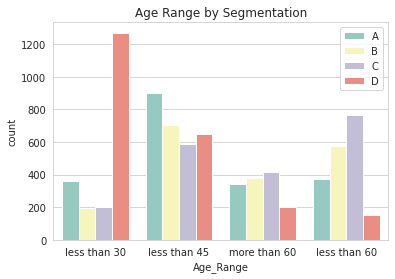

In [ ]:
sns.countplot(data=df, x='Age_Range' ,hue='Segmentation')
plt.title('Age Range by Segmentation')  
plt.savefig("Age Range by Segmentation.png", dpi=150);
plt.legend(['A','B','C','D'])
plt.show();

As it’s shown in the chart:
- Most of customers in ` D ` is less than 30.
- Most of customers in  ` A` is less than 45.
- Most of customers in  ` C` is more than 60.


Convert the `Age_Range` to dummy variables

In [ ]:
df_dummies=pd.get_dummies(df[['Age_Range']])
df=df.drop(df[['Age_Range']],axis=1)
df=pd.concat([df, df_dummies], axis=1)
df.sample(2)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Range_less than 30,Age_Range_less than 45,Age_Range_less than 60,Age_Range_more than 60
196,1,1,31,1,0.0,1,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
5946,1,1,48,1,10.0,0,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


### Scaler:

In [ ]:
df.head(3)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Range_less than 30,Age_Range_less than 45,Age_Range_less than 60,Age_Range_more than 60
0,0,0,22,0,1.0,0,4.0,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,38,1,1.0,1,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,1,67,1,1.0,0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
#Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[["Age", "Family_Size",'Work_Experience']]), columns=["Age", "Family_Size",'Work_Experience'])
df["Age"] = scaled_df["Age"]
df["Family_Size"] = scaled_df["Family_Size"]
df["Work_Experience"] = scaled_df["Work_Experience"]

In [ ]:
df.head(3)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Range_less than 30,Age_Range_less than 45,Age_Range_less than 60,Age_Range_more than 60
0,0,0,-1.284623,0,-0.451136,0,0.785536,4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,1,-0.327151,1,-0.451136,1,0.122735,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,1,1,1.408268,1,-0.451136,0,-1.202868,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Modelling

Disply the relation between the target and each features

In [ ]:
corr = df.corr()
plt.savefig('corr.png', bbox_inches='tight', pad_inches=0.0)
corr.style.background_gradient()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Category_Cat_1,Category_Cat_2,Category_Cat_3,Category_Cat_4,Category_Cat_5,Category_Cat_6,Category_Cat_7,Age_Range_less than 30,Age_Range_less than 45,Age_Range_less than 60,Age_Range_more than 60
Gender,1.000000,-0.111732,-0.030216,0.033206,0.057212,-0.061432,-0.057920,-0.024482,0.041039,-0.006544,0.214829,-0.136387,-0.227074,-0.030698,0.132781,0.023391,0.042481,0.015281,0.014577,0.011543,0.011075,0.033011,-0.037674,0.012937,-0.005641,0.054131,-0.020063,-0.040203
Ever_Married,-0.111732,1.000000,0.556892,0.188450,-0.090500,0.610642,-0.067102,-0.195860,0.167710,-0.077566,0.015791,0.022238,0.199088,-0.414947,-0.017369,0.201930,-0.094699,-0.003660,-0.078385,-0.022777,-0.022591,-0.023204,0.078036,-0.013444,-0.483486,-0.074297,0.300624,0.318468
Age,-0.030216,0.556892,1.000000,0.235752,-0.177344,0.415485,-0.270793,-0.227072,0.111533,-0.114043,-0.031729,-0.010086,0.129303,-0.442792,-0.058837,0.549588,-0.077097,-0.028782,-0.084220,-0.084932,-0.103030,-0.038916,0.199443,-0.046497,-0.648153,-0.255691,0.277867,0.769312
Graduated,0.033206,0.188450,0.235752,1.000000,0.037831,0.102736,-0.217698,-0.158542,0.344858,-0.027781,-0.112134,0.008317,-0.068019,-0.238018,-0.020639,0.003218,-0.087240,-0.016457,0.008128,-0.035646,-0.197175,-0.022979,0.175224,-0.014656,-0.349074,0.132851,0.180754,0.031540
Work_Experience,0.057212,-0.090500,-0.177344,0.037831,1.000000,-0.074266,-0.059565,0.006135,0.015076,0.001168,-0.003726,0.013568,-0.026254,-0.007874,0.174569,-0.112868,-0.004291,-0.024419,0.016437,-0.013903,-0.035004,0.010707,0.029990,0.001936,0.050750,0.163877,-0.096991,-0.159715
Spending_Score,-0.061432,0.610642,0.415485,0.102736,-0.074266,1.000000,0.100744,-0.093848,0.038948,-0.081867,-0.024213,-0.055676,0.346936,-0.268199,-0.021732,0.204095,-0.068466,-0.008711,-0.035647,-0.058547,-0.030203,-0.020342,0.086756,-0.012664,-0.311370,-0.082969,0.164828,0.282836
Family_Size,-0.057920,-0.067102,-0.270793,-0.217698,-0.059565,0.100744,1.000000,0.184639,-0.142722,0.006883,0.026703,-0.014348,0.109023,0.231376,-0.070930,-0.167923,0.025103,0.013309,0.081968,0.006033,0.161000,0.045654,-0.184514,0.038602,0.247252,-0.069682,-0.005777,-0.192312
Segmentation,-0.024482,-0.195860,-0.227072,-0.158542,0.006135,-0.093848,0.184639,1.000000,-0.120540,-0.013577,-0.093739,-0.109410,-0.023086,0.348836,-0.006506,-0.060941,0.085095,0.016030,0.020207,-0.008111,-0.012226,0.006501,-0.002559,0.004092,0.294094,-0.140676,-0.076444,-0.075634
Profession_Artist,0.041039,0.167710,0.111533,0.344858,0.015076,0.038948,-0.142722,-0.120540,1.000000,-0.212936,-0.214791,-0.254628,-0.197499,-0.310122,-0.123677,-0.201741,-0.135144,-0.011452,-0.017900,-0.040148,-0.096901,-0.009867,0.107057,0.006029,-0.258861,0.098841,0.219152,-0.073526
Profession_Doctor,-0.006544,-0.077566,-0.114043,-0.027781,0.001168,-0.081867,0.006883,-0.013577,-0.212936,1.000000,-0.094037,-0.111478,-0.086467,-0.135774,-0.054147,-0.088324,-0.059167,-0.001191,0.013981,0.011596,0.015761,-0.014119,-0.030093,0.024622,0.067780,0.047221,-0.043201,-0.090725


<Figure size 432x288 with 0 Axes>

#### Split Data:

In [ ]:
X = df.drop('Segmentation',axis=1)
y = df['Segmentation'] # target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75 ,random_state=1) # Split data into train and test set 

#### Baseline:

 Predict the most common class

In [ ]:
def baseline_model(n_predictions, value_to_predict):
    baseline_preds = []
    for i in range(n_predictions):
        baseline_preds.append(value_to_predict)
    return pd.Series(baseline_preds)

n_predictions = len(y_test)
baseline_value = y_train.value_counts().index[0]

baseline_preds = baseline_model(n_predictions, baseline_value)
baseline_preds[:5]

0    4
1    4
2    4
3    4
4    4
dtype: int64

In [ ]:
print("Accuracy Score for Baseline model : ", accuracy_score(y_test, baseline_preds))

Accuracy Score for Baseline model :  0.2860684184432325


#### Logistic Regression:

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_preds = lr.predict(X_test)
lr_preds

array([3, 0, 1, ..., 4, 1, 4])

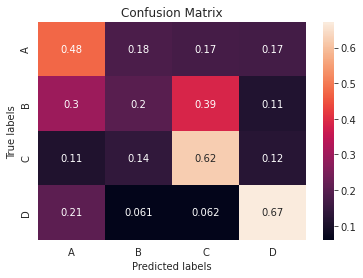

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, lr_preds, normalize='true'), annot=True, ax = ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); ax.yaxis.set_ticklabels(['A', 'B','C','D']);

In [ ]:
print("Accuracy Score for Logistic Regression: ", accuracy_score(y_test, lr_preds))

Accuracy Score for Logistic Regression:  0.5052057511155181


#### Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dt_preds = dt.predict(X_test)

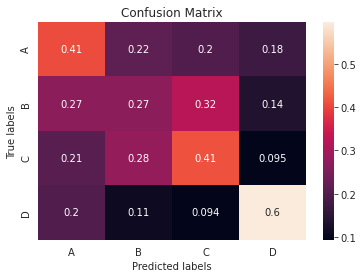

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, dt_preds, normalize='true'), annot=True, ax = ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); ax.yaxis.set_ticklabels(['A', 'B','C','D']);

In [ ]:
print("Accuracy Score for DecisionTree: ", accuracy_score(y_test, dt_preds))

Accuracy Score for DecisionTree:  0.43232523549826474


#### Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rfc_preds = rfc.predict(X_test)
rfc_preds

array([1, 0, 1, ..., 4, 3, 4])

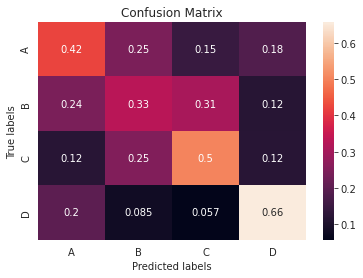

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, rfc_preds, normalize='true'), annot=True, ax = ax);

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); ax.yaxis.set_ticklabels(['A', 'B','C','D']);

In [ ]:
print("Accuracy Score for Random Forest: ", accuracy_score(y_test, rfc_preds))

Accuracy Score for Random Forest:  0.48834903321765


#### KNN Classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn_preds = knn.predict(X_test)
knn_preds

array([1, 1, 3, ..., 0, 3, 4])

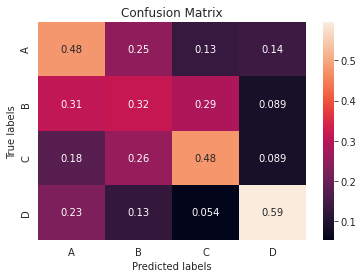

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_preds, normalize='true'), annot=True, ax = ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); ax.yaxis.set_ticklabels(['A', 'B','C','D']);

In [ ]:
print("Accuracy Score for KNeighborsClassifier: ", accuracy_score(y_test, knn_preds))

Accuracy Score for KNeighborsClassifier:  0.4744670302429351


#### SGD Classifier

In [ ]:
sgd=SGDClassifier()

In [ ]:
sgd.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgd_preds = sgd.predict(X_test)
sgd_preds

array([3, 3, 3, ..., 4, 3, 4])

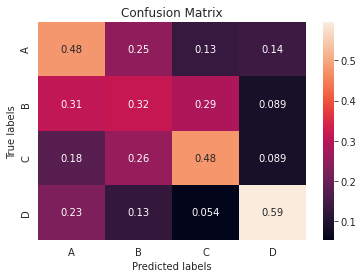

In [ ]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, knn_preds, normalize='true'), annot=True, ax = ax);


ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['A', 'B','C','D']); ax.yaxis.set_ticklabels(['A', 'B','C','D']);

In [ ]:
print("Accuracy Score for SGDClassifier: ", accuracy_score(y_test, sgd_preds))

Accuracy Score for SGDClassifier:  0.47248388696083293


### Stacking Classifier

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=9000)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# Define the stack_ls ( Contain all the Classification models )
stack_ls = [
            ("lr",  LogisticRegression()),
            ("knn", KNeighborsClassifier()),
            ("dt", DecisionTreeClassifier()),
            ('rfr', RandomForestClassifier()),
            ('sgd', SGDClassifier())]

stack_model = StackingClassifier(stack_ls, cv=5)

models = {
    "lr": LogisticRegression(),
    "knn": KNeighborsClassifier(),
    "dt": DecisionTreeClassifier(),
    "rfr" : RandomForestClassifier(),
    'sgd': SGDClassifier(),
    "stacked": stack_model
}



Compare between Classfication Models

In [ ]:
# Evaluate All Models
result_ls = []
model_ls = []

# Iterate over models dict and evaluate each seprately
for key, value in models.items():

    # gather scores KFold cross validation scores
    score = evaluate_model(value, X, y)
    result_ls.append(score) # save results
    model_ls.append(key) # save model name
    print(f"Model: {key}, Score: {np.mean(score)}")

Model: lr, Score: 0.5065689168934869
Model: knn, Score: 0.47552061126642187
Model: dt, Score: 0.4350509068588474
Model: rfr, Score: 0.4889682728082165
Model: sgd, Score: 0.47663569925581417
Model: stacked, Score: 0.5217518981079227


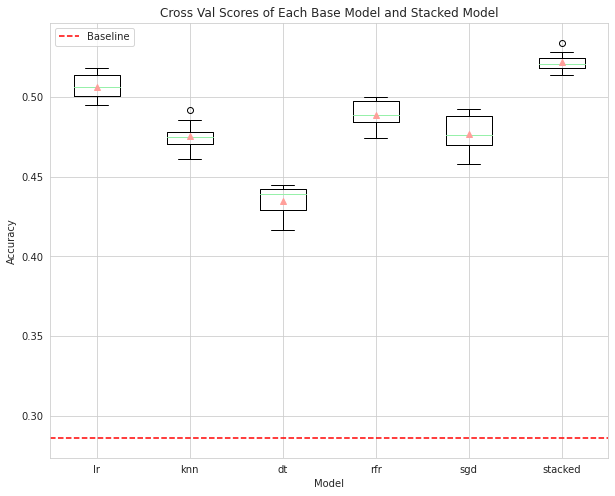

In [ ]:
plt.style.use("seaborn-pastel")
plt.figure(figsize=(10,8))
plt.boxplot(result_ls, labels=model_ls, showmeans=True)
plt.title("Cross Val Scores of Each Base Model and Stacked Model")
plt.xlabel("Model")
plt.axhline(accuracy_score(y_test,baseline_preds), linestyle="--", c="r", label="Baseline")
plt.legend()
plt.ylabel("Accuracy");
plt.savefig("Compar models.png")

As it’s shown in the chart:
- The best score Stack model is **0.5212563888050236**
- The worst score is Decision Tree is **0.4367858040041761** 


### Optmize the model:

The best model is stack model , try to improve it.

In [ ]:
# check the list of available parameters for Grid Search CV 
for key in stack_model.get_params():
    print(key)

cv
estimators
final_estimator
n_jobs
passthrough
stack_method
verbose
lr
knn
dt
rfr
sgd
lr__C
lr__class_weight
lr__dual
lr__fit_intercept
lr__intercept_scaling
lr__l1_ratio
lr__max_iter
lr__multi_class
lr__n_jobs
lr__penalty
lr__random_state
lr__solver
lr__tol
lr__verbose
lr__warm_start
knn__algorithm
knn__leaf_size
knn__metric
knn__metric_params
knn__n_jobs
knn__n_neighbors
knn__p
knn__weights
dt__ccp_alpha
dt__class_weight
dt__criterion
dt__max_depth
dt__max_features
dt__max_leaf_nodes
dt__min_impurity_decrease
dt__min_impurity_split
dt__min_samples_leaf
dt__min_samples_split
dt__min_weight_fraction_leaf
dt__presort
dt__random_state
dt__splitter
rfr__bootstrap
rfr__ccp_alpha
rfr__class_weight
rfr__criterion
rfr__max_depth
rfr__max_features
rfr__max_leaf_nodes
rfr__max_samples
rfr__min_impurity_decrease
rfr__min_impurity_split
rfr__min_samples_leaf
rfr__min_samples_split
rfr__min_weight_fraction_leaf
rfr__n_estimators
rfr__n_jobs
rfr__oob_score
rfr__random_state
rfr__verbose
rfr__warm

Add avalibile parameters to Grid Search CV

In [ ]:
param_grid = {
   
    "dt__criterion": ["gini", "entropy"], 
    "lr__solver": ["lbfgs", "liblinear"],                        
    'rfr__criterion':["gini", "entropy"],  
     "knn__n_neighbors": [5,10], 
     "sgd__max_iter":[1000,1500]  
}

grid_model = GridSearchCV(estimator=stack_model, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=2)


In [ ]:
grid_model.fit(X,y) # fit the grid

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed: 16.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=5,
                                          estimators=[('lr',
                                                       LogisticRegression(C=1.0,
                                                                          class_weight=None,
                                                                          dual=False,
                                                                          fit_intercept=True,
                                                                          intercept_scaling=1,
                                                                          l1_ratio=None,
                                                                          max_iter=100,
                                                                          multi_class='auto',
                                                                          n_jobs=None,
                                                

In [ ]:
print("Grid model score: ", grid_model.best_score_) 

Grid model score:  0.5288825842692313


In [ ]:
print("Best params: ", grid_model.best_params_)

Best params:  {'dt__criterion': 'gini', 'knn__n_neighbors': 10, 'lr__solver': 'lbfgs', 'rfr__criterion': 'gini', 'sgd__max_iter': 1500}


In [ ]:
# Pull out best model CV results to plot alongside all models tested
grid_df = pd.DataFrame(grid_model.cv_results_)

In [ ]:
grid_df.head(4)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_knn__n_neighbors,param_lr__solver,param_rfr__criterion,param_sgd__max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,12.274022,0.064713,0.295417,0.004773,gini,5,lbfgs,gini,1000,"{'dt__criterion': 'gini', 'knn__n_neighbors': ...",0.534696,0.509913,0.491326,0.525108,0.518909,0.515991,0.014743,32
1,12.303123,0.060227,0.297902,0.007780,gini,5,lbfgs,gini,1500,"{'dt__criterion': 'gini', 'knn__n_neighbors': ...",0.534077,0.527261,0.499380,0.532548,0.515809,0.521815,0.012920,10
2,13.829660,0.062788,0.291779,0.003564,gini,5,lbfgs,entropy,1000,"{'dt__criterion': 'gini', 'knn__n_neighbors': ...",0.536555,0.516109,0.499380,0.528828,0.514569,0.519088,0.012788,25
3,14.045423,0.033372,0.295685,0.004976,gini,5,lbfgs,entropy,1500,"{'dt__criterion': 'gini', 'knn__n_neighbors': ...",0.532218,0.521685,0.490706,0.531928,0.518909,0.519089,0.015163,24


In [ ]:
grid_cv_score_best = grid_df[grid_df["rank_test_score"]==1].loc[:,"split0_test_score":"split4_test_score"].T[9].values

In [ ]:
print("The score of grid cv stack model: ", grid_cv_score_best)

The score of grid cv stack model:  [0.54399009 0.52664188 0.4913259  0.54246745 0.5399876 ]


In [ ]:
# Add results to running list of other model scores
result_ls.append(grid_cv_score_best)
model_ls.append("grid")

<Figure size 432x288 with 0 Axes>

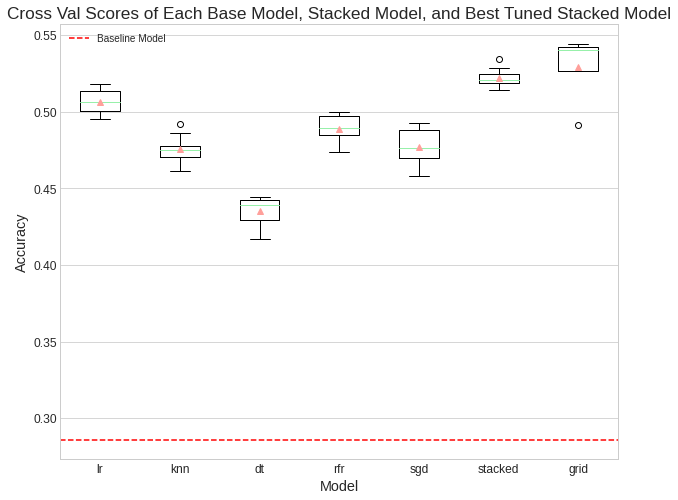

In [ ]:
# plot results
plt.style.use("seaborn-whitegrid")
plt.tight_layout()
plt.figure(figsize=(10,8))
plt.boxplot(result_ls, labels=model_ls, showmeans=True)
plt.title("Cross Val Scores of Each Base Model, Stacked Model, and Best Tuned Stacked Model", fontsize="xx-large")
plt.xlabel("Model", fontsize="x-large")
plt.xticks(fontsize="large")
plt.yticks(fontsize="large")
plt.axhline(accuracy_score(y_test,baseline_preds), linestyle="--", c="r", label="Baseline Model")
plt.legend()
plt.ylabel("Accuracy", fontsize="x-large")
plt.grid(b=None, axis="x")
plt.savefig("compare models with grid.png", dpi=150);

As it’s shown in the chart:
- The Accuracy after apply the Grid Search CV is increased, So the best score is Stack model with Grid Search CV is **0.5288825842692313**
 